In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import plotly.express as px
import plotly.graph_objects as go


from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
z = pd.read_pickle("/content/drive/MyDrive/CHINA_DATASET/brofinalll.plk")

In [6]:
z.head()

station real_dates  ...  longitude     states
0  Adarsh Nagar, Jaipur - RSPCB 2018-01-01  ...  75.836858  Rajasthan
1  Adarsh Nagar, Jaipur - RSPCB 2018-01-02  ...  75.836858  Rajasthan
2  Adarsh Nagar, Jaipur - RSPCB 2018-01-03  ...  75.836858  Rajasthan
3  Adarsh Nagar, Jaipur - RSPCB 2018-01-04  ...  75.836858  Rajasthan
4  Adarsh Nagar, Jaipur - RSPCB 2018-01-05  ...  75.836858  Rajasthan

[5 rows x 6 columns]

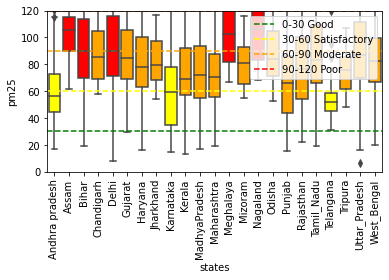

In [9]:
phase_1 = z[(z['real_dates']>="2020-02-01")&(z['real_dates']<="2020-03-25")]
phase_2 = z[(z['real_dates']>="2019-02-01")&(z['real_dates']<="2019-03-25")]
phase_3 = z[(z['real_dates']>="2018-02-01")&(z['real_dates']<="2018-03-25")]
phase_3 = phase_3.sort_values(by=["states"],ascending = True)
ax = sns.boxplot(x="states",y="pm25",data=phase_3)
medians = phase_3.groupby(by=['states'])['pm25'].median()
ax.axhline(30, ls='--',color="green",label="0-30 Good")
ax.axhline(60, ls='--',color = "yellow",label = "30-60 Satisfactory")
ax.axhline(90 , ls='--',color = "orange",label="60-90 Moderate")
ax.axhline(120 , ls='--',color = "red",label="90-120 Poor")

for i,boxes in enumerate(ax.artists):
    if medians[i]>0 and medians[i]<30:
      boxes.set_facecolor("green")
    elif medians[i]>=30 and medians[i]<60:
      boxes.set_facecolor("yellow")
    elif medians[i]>=60 and medians[i]<90:
      boxes.set_facecolor("orange")
    else:
      boxes.set_facecolor("red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim([0,120])
plt.legend(loc='upper right')
plt.gcf().subplots_adjust(bottom=0.32)
plt.savefig("phase1.png")
plt.show()

In [ ]:
Mar_may_2019=z[(z['real_dates'] >= '2019-03') & (z['real_dates'] <= '2019-05')]
Mar_may_2020=z[(z['real_dates'] >= '2020-03') & (z['real_dates'] <= '2020-05')]
Mar_may_2018=z[(z['real_dates'] >= '2018-03') & (z['real_dates'] <= '2018-05')]
fig = go.Figure()
fig.add_trace(go.Scatter(x=Mar_may_2019['real_dates'], y=Mar_may_2019['pm25'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2019'))
fig.add_trace(go.Scatter(x=Mar_may_2020['real_dates'], y=Mar_may_2020['pm25'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2020'))
fig.add_trace(go.Scatter(x=Mar_may_2018['real_dates'], y=Mar_may_2018['pm25'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2018'))

fig.show()

In [ ]:
phase_1 = z[(z['real_dates']>="2020-03-25")&(z['real_dates']<="2020-04-14")]
phase_2 = z[(z['real_dates']>="2020-03-15")&(z['real_dates']<="2020-05-03")]
phase_3 = z[(z['real_dates']>="2020-05-04")&(z['real_dates']<="2020-05-17")]
phase_4 = z[(z['real_dates']>="2020-05-18")&(z['real_dates']<="2020-05-31")]
phase_5 = z[(z['real_dates']>="2020-06-01")&(z['real_dates']<="2020-06-30")]
phase_6 = z[(z['real_dates']>="2020-07-01")&(z['real_dates']<="2020-07-31")]
phase_7 = z[(z['real_dates']>="2020-08-01")&(z['real_dates']<="2020-08-31")]

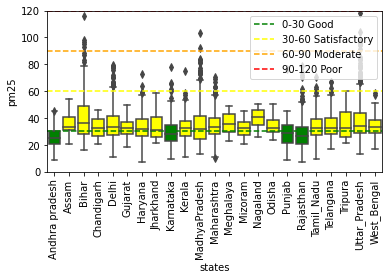

In [ ]:
phase_1 = phase_1.sort_values(by=["states"],ascending = True)
ax = sns.boxplot(x="states",y="pm25",data=phase_1)
medians = phase_1.groupby(by=['states'])['pm25'].median()
ax.axhline(30, ls='--',color="green",label="0-30 Good")
ax.axhline(60, ls='--',color = "yellow",label = "30-60 Satisfactory")
ax.axhline(90 , ls='--',color = "orange",label="60-90 Moderate")
ax.axhline(120 , ls='--',color = "red",label="90-120 Poor")

for i,boxes in enumerate(ax.artists):
    if medians[i]>0 and medians[i]<30:
      boxes.set_facecolor("green")
    elif medians[i]>=30 and medians[i]<60:
      boxes.set_facecolor("yellow")
    elif medians[i]>=60 and medians[i]<90:
      boxes.set_facecolor("orange")
    else:
      boxes.set_facecolor("red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim([0,120])
plt.legend(loc='upper right')
plt.gcf().subplots_adjust(bottom=0.32)
plt.savefig("phase1.png")
plt.show()

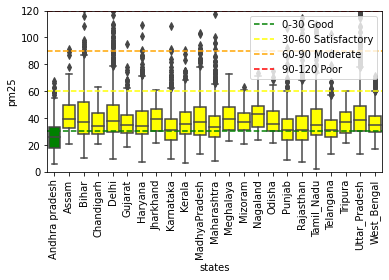

In [ ]:
phase_2 = phase_2.sort_values(by=["states"],ascending = True)
ax = sns.boxplot(x="states",y="pm25",data=phase_2)
medians = phase_2.groupby(by=['states'])['pm25'].median()
ax.axhline(30, ls='--',color="green",label="0-30 Good")
ax.axhline(60, ls='--',color = "yellow",label = "30-60 Satisfactory")
ax.axhline(90 , ls='--',color = "orange",label="60-90 Moderate")
ax.axhline(120 , ls='--',color = "red",label="90-120 Poor")

for i,boxes in enumerate(ax.artists):
    if medians[i]>0 and medians[i]<30:
      boxes.set_facecolor("green")
    elif medians[i]>=30 and medians[i]<60:
      boxes.set_facecolor("yellow")
    elif medians[i]>=60 and medians[i]<90:
      boxes.set_facecolor("orange")
    else:
      boxes.set_facecolor("red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim([0,120])
plt.legend(loc='upper right')
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.32)
plt.savefig("phase2.png")
plt.show()

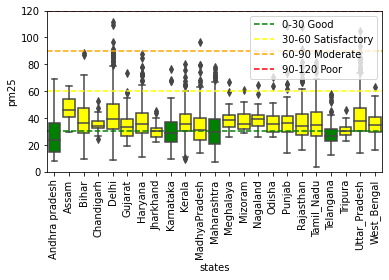

In [ ]:
phase_3 = phase_3.sort_values(by=["states"],ascending = True)
ax = sns.boxplot(x="states",y="pm25",data=phase_3)
medians = phase_3.groupby(by=['states'])['pm25'].median()
ax.axhline(30, ls='--',color="green",label="0-30 Good")
ax.axhline(60, ls='--',color = "yellow",label = "30-60 Satisfactory")
ax.axhline(90 , ls='--',color = "orange",label="60-90 Moderate")
ax.axhline(120 , ls='--',color = "red",label="90-120 Poor")

for i,boxes in enumerate(ax.artists):
    if medians[i]>0 and medians[i]<30:
      boxes.set_facecolor("green")
    elif medians[i]>=30 and medians[i]<60:
      boxes.set_facecolor("yellow")
    elif medians[i]>=60 and medians[i]<90:
      boxes.set_facecolor("orange")
    else:
      boxes.set_facecolor("red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim([0,120])
plt.legend(loc='upper right')
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.32)
plt.savefig("phase3.png")
plt.show()

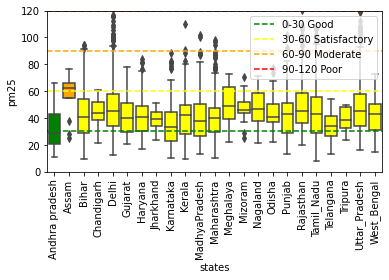

In [ ]:
phase_4 = phase_4.sort_values(by=["states"],ascending = True)
ax = sns.boxplot(x="states",y="pm25",data=phase_4)
medians = phase_4.groupby(by=['states'])['pm25'].median()
ax.axhline(30, ls='--',color="green",label="0-30 Good")
ax.axhline(60, ls='--',color = "yellow",label = "30-60 Satisfactory")
ax.axhline(90 , ls='--',color = "orange",label="60-90 Moderate")
ax.axhline(120 , ls='--',color = "red",label="90-120 Poor")

for i,boxes in enumerate(ax.artists):
    if medians[i]>0 and medians[i]<30:
      boxes.set_facecolor("green")
    elif medians[i]>=30 and medians[i]<60:
      boxes.set_facecolor("yellow")
    elif medians[i]>=60 and medians[i]<90:
      boxes.set_facecolor("orange")
    else:
      boxes.set_facecolor("red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim([0,120])
plt.legend(loc='upper right')
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.32)
plt.savefig("phase4.png")
plt.show()

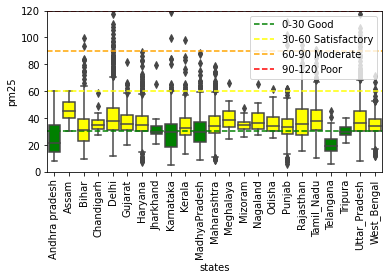

In [ ]:
phase_5 = phase_5.sort_values(by=["states"],ascending = True)
ax = sns.boxplot(x="states",y="pm25",data=phase_5)
medians = phase_5.groupby(by=['states'])['pm25'].median()
ax.axhline(30, ls='--',color="green",label="0-30 Good")
ax.axhline(60, ls='--',color = "yellow",label = "30-60 Satisfactory")
ax.axhline(90 , ls='--',color = "orange",label="60-90 Moderate")
ax.axhline(120 , ls='--',color = "red",label="90-120 Poor")

for i,boxes in enumerate(ax.artists):
    if medians[i]>0 and medians[i]<30:
      boxes.set_facecolor("green")
    elif medians[i]>=30 and medians[i]<60:
      boxes.set_facecolor("yellow")
    elif medians[i]>=60 and medians[i]<90:
      boxes.set_facecolor("orange")
    else:
      boxes.set_facecolor("red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim([0,120])
plt.legend(loc='upper right')
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.32)
plt.savefig("phase5.png")
plt.show()

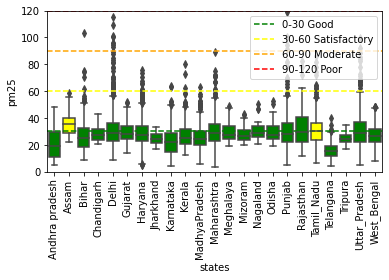

In [ ]:
phase_6 = phase_6.sort_values(by=["states"],ascending = True)
ax = sns.boxplot(x="states",y="pm25",data=phase_6)
medians = phase_6.groupby(by=['states'])['pm25'].median()
ax.axhline(30, ls='--',color="green",label="0-30 Good")
ax.axhline(60, ls='--',color = "yellow",label = "30-60 Satisfactory")
ax.axhline(90 , ls='--',color = "orange",label="60-90 Moderate")
ax.axhline(120 , ls='--',color = "red",label="90-120 Poor")

for i,boxes in enumerate(ax.artists):
    if medians[i]>0 and medians[i]<30:
      boxes.set_facecolor("green")
    elif medians[i]>=30 and medians[i]<60:
      boxes.set_facecolor("yellow")
    elif medians[i]>=60 and medians[i]<90:
      boxes.set_facecolor("orange")
    else:
      boxes.set_facecolor("red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim([0,120])
plt.legend(loc='upper right')
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.32)
plt.savefig("phase6.png")
plt.show()

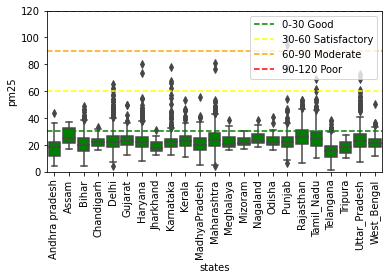

In [ ]:
phase_7 = phase_7.sort_values(by=["states"],ascending = True)
ax = sns.boxplot(x="states",y="pm25",data=phase_7)
medians = phase_7.groupby(by=['states'])['pm25'].median()
ax.axhline(30, ls='--',color="green",label="0-30 Good")
ax.axhline(60, ls='--',color = "yellow",label = "30-60 Satisfactory")
ax.axhline(90 , ls='--',color = "orange",label="60-90 Moderate")
ax.axhline(120 , ls='--',color = "red",label="90-120 Poor")

for i,boxes in enumerate(ax.artists):
    if medians[i]>0 and medians[i]<30:
      boxes.set_facecolor("green")
    elif medians[i]>=30 and medians[i]<60:
      boxes.set_facecolor("yellow")
    elif medians[i]>=60 and medians[i]<90:
      boxes.set_facecolor("orange")
    else:
      boxes.set_facecolor("red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim([0,120])
plt.legend(loc='upper right')
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.32)
plt.savefig("phase7.png")
plt.show()

In [ ]:
medians

states
Andhra pradesh    25.088156
Assam             33.589410
Bihar             36.302083
Chandigarh        32.222409
Delhi             33.331929
Gujarat           32.633562
Haryana           31.568003
Jharkhand         30.862032
Karnataka         28.097378
Kerala            32.255442
MadhyaPradesh     31.928760
Maharashtra       33.619037
Meghalaya         35.231696
Mizoram           32.228819
Nagaland          41.059674
Odisha            32.821509
Punjab            28.913180
Rajasthan         26.342776
Tamil_Nadu        32.577886
Telangana         32.878716
Tripura           32.538634
Uttar_Pradesh     34.378519
West_Bengal       33.126723
Name: pm25, dtype: float64

In [ ]:
p = p.sort_values(by="pm25",ascending=False)

states       pm25
2            Bihar  40.861184
14        Nagaland  40.032429
21   Uttar_Pradesh  38.086282
12       Meghalaya  35.945517
20         Tripura  35.916212
1            Assam  35.875886
10   MadhyaPradesh  35.858062
4            Delhi  35.217381
7        Jharkhand  34.969345
19       Telangana  34.721123
15          Odisha  34.541160
11     Maharashtra  34.200862
18      Tamil_Nadu  33.562923
22     West_Bengal  33.266621
9           Kerala  32.994953
5          Gujarat  32.935305
3       Chandigarh  32.844411
6          Haryana  32.831966
13         Mizoram  32.444806
8        Karnataka  29.565686
17       Rajasthan  28.959567
16          Punjab  28.584330
0   Andhra pradesh  26.143627

In [ ]:
z['year'] = [d.year for d in z.real_dates]
z['month'] = [d.strftime('%b') for d in z.real_dates]

In [ ]:
p =z.groupby(['station','year'], as_index=False)['pm25'].mean()

In [ ]:
p = p.sort_values(by=["year"])

In [ ]:
p.head()

station  year       pm25
0                 Adarsh Nagar, Jaipur - RSPCB  2018  53.382720
324          Kunjaban, Agartala - Tripura SPCB  2018  75.157935
321               Kodungaiyur, Chennai - TNPCB  2018  86.816404
318  Knowledge Park - V, Greater Noida - UPPCB  2018  75.696688
666                Shyam Nagar, Palwal - HSPCB  2018  65.276383

In [ ]:
lat_lon = pd.read_excel("/content/drive/MyDrive/CHINA_INDIA_VARIABLES/states_latitude_longitude.xlsx")

In [ ]:
latitude = []
longitude = []
states = []
for i in p['station']:
  for j in range(len(lat_lon['station_name'])):
    if lat_lon['station_name'][j] == i: 
      states.append(lat_lon["State"][j])
      latitude.append(lat_lon["latitude"][j])
      longitude.append(lat_lon["longitude"][j])

In [ ]:
p["latitude"] = latitude
p["longitude"]= longitude
p["state"] = states

In [ ]:
p.head()

station  year  ...  longitude          state
0                 Adarsh Nagar, Jaipur - RSPCB  2018  ...  75.836858      Rajasthan
324          Kunjaban, Agartala - Tripura SPCB  2018  ...  91.288736        Tripura
321               Kodungaiyur, Chennai - TNPCB  2018  ...  80.264200     Tamil_Nadu
318  Knowledge Park - V, Greater Noida - UPPCB  2018  ...  77.453663  Uttar_Pradesh
666                Shyam Nagar, Palwal - HSPCB  2018  ...  77.332067        Haryana

[5 rows x 6 columns]

In [ ]:
year_2020 = p[(p['year']==2020)]
year_2018 = p[(p['year']==2018)]
year_2019 = p[(p["year"]==2019)]

In [ ]:
year_2020.shape

(258, 6)

In [ ]:
year_2020

station  ...           state
653                 Shasthri Nagar, Ratlam - IPCA Lab  ...   MadhyaPradesh
593                    Secretariat, Amaravati - APPCB  ...  Andhra pradesh
767                              Worli, Mumbai - MPCB  ...     Maharashtra
671      Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB  ...     West_Bengal
590                       Sanjay Palace, Agra - UPPCB  ...   Uttar_Pradesh
..                                                ...  ...             ...
371                   Manali Village, Chennai - TNPCB  ...      Tamil_Nadu
368                         Malad West, Mumbai - IITM  ...     Maharashtra
365  Major Dhyan Chand National Stadium, Delhi - DPCC  ...           Delhi
287                    Jai Bhim Nagar, Meerut - UPPCB  ...   Uttar_Pradesh
773                       Zoo Park, Hyderabad - TSPCB  ...       Telangana

[258 rows x 6 columns]

LOCATION WISE CLUSTERING

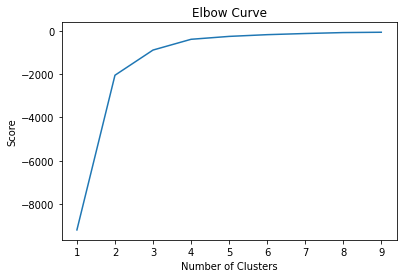

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = year_2020[['latitude']]
X_axis = year_2020[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 8, init ='k-means++')
kmeans.fit(year_2020[year_2020.columns[3:5]]) # Compute k-means clustering.
year_2020['cluster_label'] = kmeans.fit_predict(year_2020[year_2020.columns[3:5]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(year_2020[year_2020.columns[3:5]]) # Labels of each point
year_2020.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



station  ...  cluster_label
653             Shasthri Nagar, Ratlam - IPCA Lab  ...              7
593                Secretariat, Amaravati - APPCB  ...              6
767                          Worli, Mumbai - MPCB  ...              1
671  Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB  ...              2
590                   Sanjay Palace, Agra - UPPCB  ...              0
713                    Tirumala, Tirupati - APPCB  ...              3
581                      Samanpura, Patna - BSPCB  ...              5
710               Thavakkara, Kannur - Kerala PCB  ...              3
647   Sector-D Industrial Area, Mandideep - MPPCB  ...              4
770              Yamunapuram, Bulandshahr - UPPCB  ...              0

[10 rows x 7 columns]

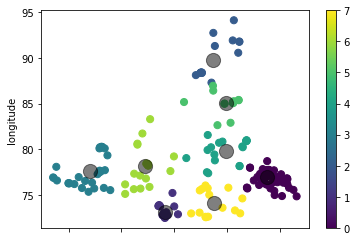

In [ ]:
year_2020.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
y = [] 
for i in year_2020['cluster_label']:
  if i==0:
    y.append("red")
  elif i==1:
    y.append("orange")
  elif i==2:
    y.append("green")
  elif i==3:
    y.append("yellow")
  elif i==4:
    y.append("violet")
  elif i==5:
    y.append("black")
  elif i==6:
    y.append("pink")
  elif i==7:
    y.append("brown")

In [ ]:
year_2020["color"]=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(year_2020[year_2020['pm25']>0].index)):
    folium.Circle(
        location=[year_2020.iloc[i]['latitude'],year_2020.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ year_2020.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(year_2020.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(year_2020.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(year_2020.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=year_2020.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

In [ ]:
kmeans = KMeans(n_clusters = 8, init ='k-means++')
kmeans.fit(year_2019[year_2019.columns[3:5]]) # Compute k-means clustering.
year_2019['cluster_label'] = kmeans.fit_predict(year_2019[year_2019.columns[3:5]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(year_2019[year_2019.columns[3:5]]) # Labels of each point
year_2019.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



station  ...  cluster_label
451        New Collectorate, Baghpat - UPPCB  ...              0
751        Vinoba Nagara, Shivamogga - KSPCB  ...              3
448                Nerul, Navi Mumbai - MPCB  ...              1
442                Nehru Nagar, Delhi - DPCC  ...              0
61       Bandra Kurla Complex, Mumbai - IITM  ...              1
58   Bandhavgar Colony, Satna - Birla Cement  ...              6
454   New Industrial Town, Faridabad - HSPCB  ...              0
622               Sector-18, Panipat - HSPCB  ...              0
55               Ballygunge, Kolkata - WBPCB  ...              2
445              Nehru Nagar, Kanpur - UPPCB  ...              6

[10 rows x 7 columns]

In [ ]:
y = [] 
for i in year_2019['cluster_label']:
  if i==0:
    y.append("red")
  elif i==1:
    y.append("orange")
  elif i==2:
    y.append("green")
  elif i==3:
    y.append("yellow")
  elif i==4:
    y.append("violet")
  elif i==5:
    y.append("black")
  elif i==6:
    y.append("pink")
  elif i==7:
    y.append("brown")

In [ ]:
year_2019["color"]=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(year_2019[year_2019['pm25']>0].index)):
    folium.Circle(
        location=[year_2019.iloc[i]['latitude'],year_2019.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ year_2019.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(year_2019.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(year_2019.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(year_2019.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=year_2019.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

In [ ]:
kmeans = KMeans(n_clusters = 8, init ='k-means++')
kmeans.fit(year_2018[year_2018.columns[3:5]]) # Compute k-means clustering.
year_2018['cluster_label'] = kmeans.fit_predict(year_2018[year_2018.columns[3:5]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(year_2018[year_2018.columns[3:5]]) # Labels of each point
year_2018.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



station  ...  cluster_label
0                    Adarsh Nagar, Jaipur - RSPCB  ...              0
324             Kunjaban, Agartala - Tripura SPCB  ...              2
321                  Kodungaiyur, Chennai - TNPCB  ...              3
318     Knowledge Park - V, Greater Noida - UPPCB  ...              0
666                   Shyam Nagar, Palwal - HSPCB  ...              0
315   Knowledge Park - III, Greater Noida - UPPCB  ...              0
312        Khindipada-Bhandup West, Mumbai - IITM  ...              4
309                     Khadakpada, Kalyan - MPCB  ...              4
669  Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB  ...              2
663              Shrivastav Colony, Damoh - MPPCB  ...              5

[10 rows x 7 columns]

In [ ]:
y = [] 
for i in year_2018['cluster_label']:
  if i==0:
    y.append("red")
  elif i==1:
    y.append("orange")
  elif i==2:
    y.append("green")
  elif i==3:
    y.append("yellow")
  elif i==4:
    y.append("violet")
  elif i==5:
    y.append("black")
  elif i==6:
    y.append("pink")
  elif i==7:
    y.append("brown")

In [ ]:
year_2018["color"]=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(year_2018[year_2018['pm25']>0].index)):
    folium.Circle(
        location=[year_2018.iloc[i]['latitude'],year_2018.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ year_2018.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(year_2018.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(year_2018.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(year_2018.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=year_2018.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

using concentration dividing

In [ ]:
year_2020

station  ...   color
653                 Shasthri Nagar, Ratlam - IPCA Lab  ...   brown
593                    Secretariat, Amaravati - APPCB  ...    pink
767                              Worli, Mumbai - MPCB  ...  orange
671      Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB  ...   green
590                       Sanjay Palace, Agra - UPPCB  ...     red
..                                                ...  ...     ...
371                   Manali Village, Chennai - TNPCB  ...  yellow
368                         Malad West, Mumbai - IITM  ...  orange
365  Major Dhyan Chand National Stadium, Delhi - DPCC  ...     red
287                    Jai Bhim Nagar, Meerut - UPPCB  ...     red
773                       Zoo Park, Hyderabad - TSPCB  ...    pink

[258 rows x 8 columns]

In [ ]:
p_2019=year_2019.iloc[:,[0,2]]

In [ ]:
x = {}
for i,j in enumerate(p_2019.iloc[:,0]):
  if j not in x:
    x[j]=[p_2019.iloc[i,1]]
  else:
    x[j].append(p_2019.iloc[i,1])

In [ ]:
y = pd.DataFrame(x).T

In [ ]:
y.columns = ["pm25"]

In [ ]:
y

pm25
New Collectorate, Baghpat - UPPCB      59.108504
Vinoba Nagara, Shivamogga - KSPCB      68.815432
Nerul, Navi Mumbai - MPCB              98.821548
Nehru Nagar, Delhi - DPCC              69.977466
Bandra Kurla Complex, Mumbai - IITM    74.753207
...                                          ...
Victoria, Kolkata - WBPCB              65.684896
Manali, Chennai - CPCB                 66.397269
Vijay Nagar, Ramanagara - KSPCB        74.982538
Vikas Sadan, Gurugram - HSPCB          88.337151
Central University, Hyderabad - TSPCB  34.802807

[258 rows x 1 columns]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



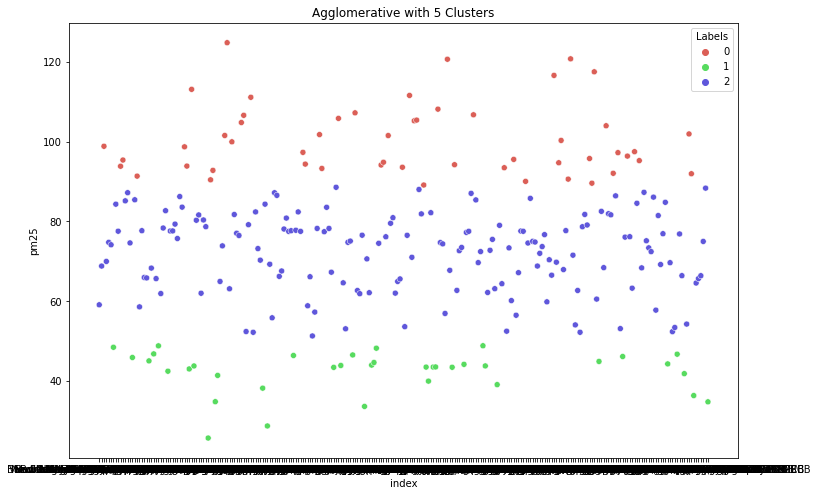

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(scaled_features)

y['Labels'] = agglom.labels_
y  = y.reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(y['index'],y['pm25'], hue=y['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 5 Clusters')
plt.show()

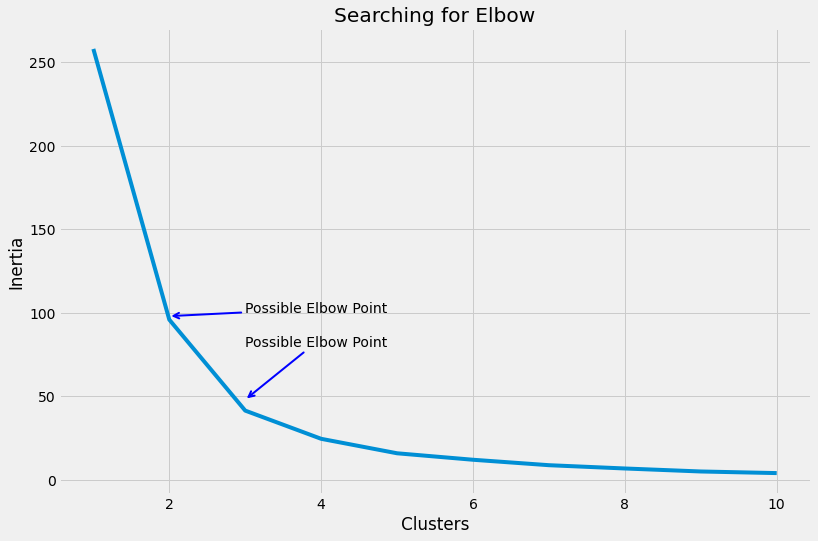

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(scaled_features)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(2, 98), xytext=(3, 100), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3,48), xytext=(3, 80), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



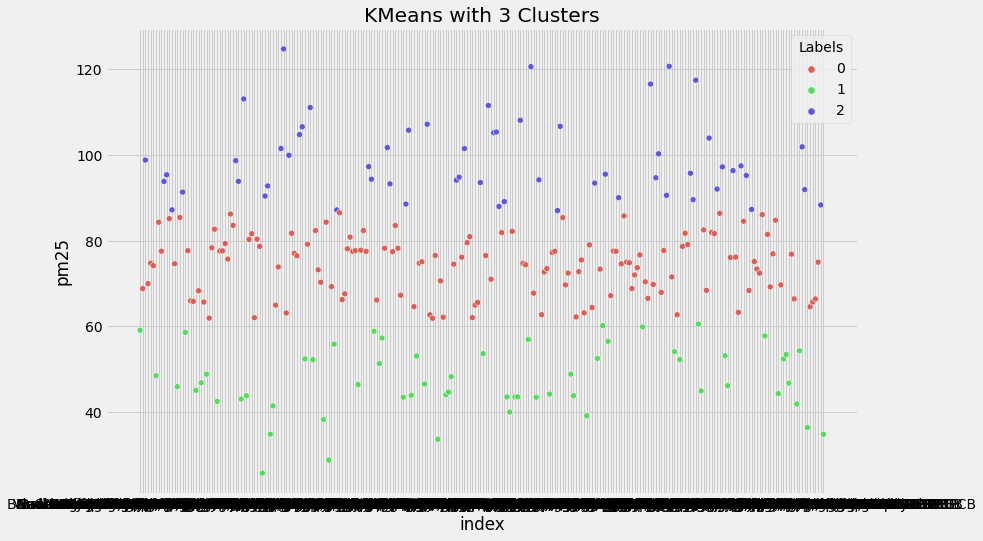

In [ ]:
km3 = KMeans(n_clusters=3).fit(y)

y['Labels'] = km3.labels_
y = y.reset_index()
plt.figure(figsize=(12, 8))

sns.scatterplot(y['index'],y['pm25'], hue=y['Labels'], 
                palette=sns.color_palette('hls',3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [ ]:
latitude = []
longitude = []
states = []
for i in y['index']:
  for j in range(len(lat_lon['station_name'])):
    if lat_lon['station_name'][j] == i: 
      states.append(lat_lon["State"][j])
      latitude.append(lat_lon["latitude"][j])
      longitude.append(lat_lon["longitude"][j])

In [ ]:
y["latitude"] = latitude
y["longitude"] = longitude

In [ ]:
y

index       pm25  ...   latitude  longitude
0        New Collectorate, Baghpat - UPPCB  59.108504  ...  28.974801  77.213357
1        Vinoba Nagara, Shivamogga - KSPCB  68.815432  ...  13.940000  75.555917
2                Nerul, Navi Mumbai - MPCB  98.821548  ...  19.008751  73.016620
3                Nehru Nagar, Delhi - DPCC  69.977466  ...  28.567890  77.250515
4      Bandra Kurla Complex, Mumbai - IITM  74.753207  ...  19.053536  72.846430
..                                     ...        ...  ...        ...        ...
253              Victoria, Kolkata - WBPCB  65.684896  ...  22.544808  88.340369
254                 Manali, Chennai - CPCB  66.397269  ...  13.164544  80.262850
255        Vijay Nagar, Ramanagara - KSPCB  74.982538  ...  12.733409  77.298051
256          Vikas Sadan, Gurugram - HSPCB  88.337151  ...  28.450124  77.026305
257  Central University, Hyderabad - TSPCB  34.802807  ...  17.460103  78.334361

[258 rows x 5 columns]

In [ ]:
e = [] 
for i in y['cluster']:
  if i==0:
    e.append("blue")
  elif i==1:
    e.append("orange")
  elif i==2:
    e.append("green")
  # elif i==3:
  #   e.append("yellow")
  # elif i==4:
  #   e.append("violet")
  # elif i==5:
  #   e.append("black")
  # elif i==6:
  #   e.append("pink")
  # elif i==7:
  #   e.append("brown")

In [ ]:
y["color"]=e

In [ ]:
y.columns = ["station","pm25","cluster","latitude","longitude","color"]

Text(0.5, 1.0, 'clusters according to PM2.5 concentration')

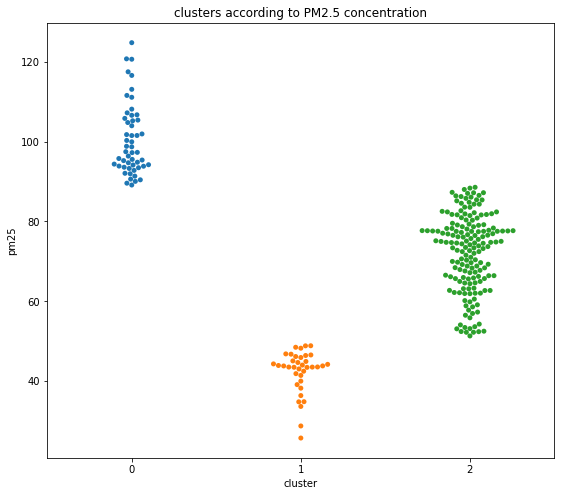

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='cluster', y='pm25', data=y, ax=ax)
ax.set_title('clusters according to PM2.5 concentration')


In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(y[y['pm25']>0].index)):
    folium.Circle(
        location=[y.iloc[i]['latitude'],y.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ y.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(y.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(y.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(y.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =0,
        fill_color=y.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

In [ ]:
p_2018=year_2018.iloc[:,[0,2]]

In [ ]:
x = {}
for i,j in enumerate(p_2018.iloc[:,0]):
  if j not in x:
    x[j]=[p_2018.iloc[i,1]]
  else:
    x[j].append(p_2018.iloc[i,1])

In [ ]:
y = pd.DataFrame(x).T

In [ ]:
y.columns = ["pm25"]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



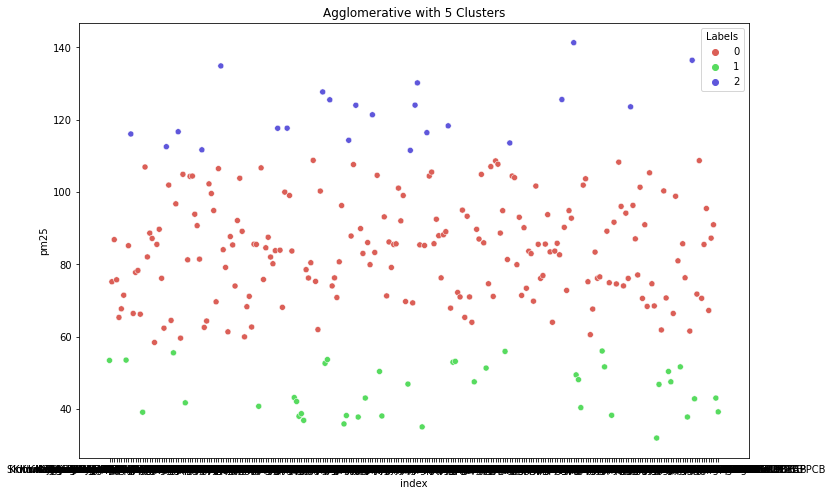

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(scaled_features)

y['Labels'] = agglom.labels_
y  = y.reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(y['index'],y['pm25'], hue=y['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 5 Clusters')
plt.show()

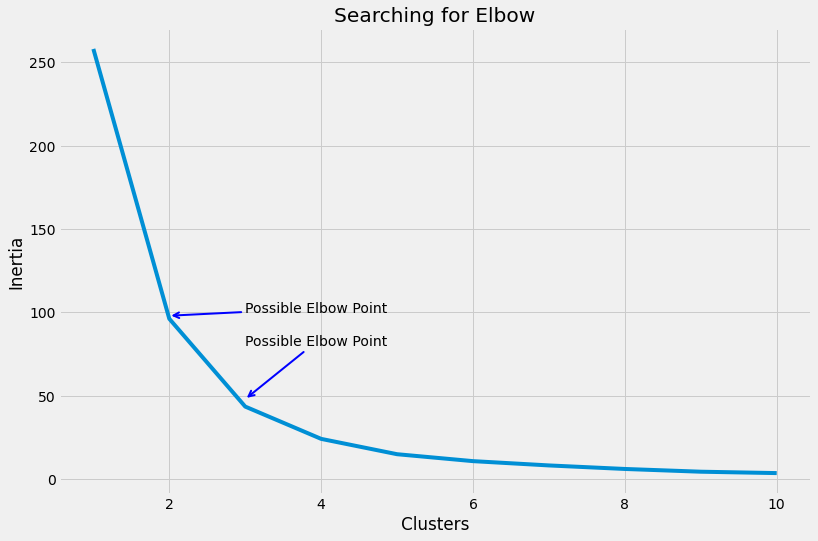

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(scaled_features)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(2, 98), xytext=(3, 100), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3,48), xytext=(3, 80), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



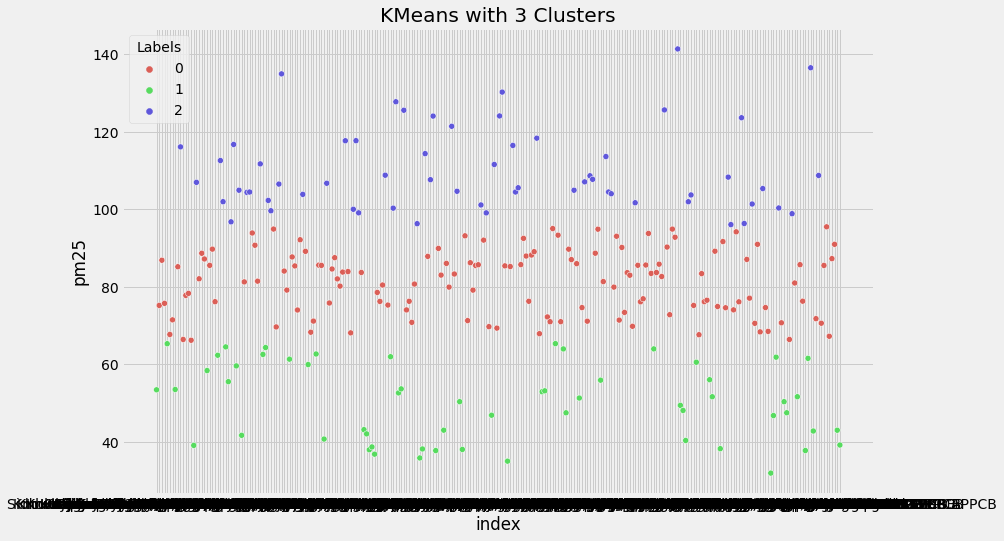

In [ ]:
km3 = KMeans(n_clusters=3).fit(y)

y['Labels'] = km3.labels_
y = y.reset_index()
plt.figure(figsize=(12, 8))

sns.scatterplot(y['index'],y['pm25'], hue=y['Labels'], 
                palette=sns.color_palette('hls',3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [ ]:
latitude = []
longitude = []
states = []
for i in y['index']:
  for j in range(len(lat_lon['station_name'])):
    if lat_lon['station_name'][j] == i: 
      states.append(lat_lon["State"][j])
      latitude.append(lat_lon["latitude"][j])
      longitude.append(lat_lon["longitude"][j])

In [ ]:
y["latitude"] = latitude
y["longitude"] = longitude

In [ ]:
e = [] 
for i in y['Labels']:
  if i==0:
    e.append("blue")
  elif i==1:
    e.append("orange")
  elif i==2:
    e.append("green")
  # elif i==3:
  #   e.append("yellow")
  # elif i==4:
  #   e.append("violet")
  # elif i==5:
  #   e.append("black")
  # elif i==6:
  #   e.append("pink")
  # elif i==7:
  #   e.append("brown")

In [ ]:
y["color"]=e

In [ ]:
y.columns = ["station","pm25","cluster","latitude","longitude","color"]

Text(0.5, 1.0, 'clusters according to PM2.5 concentration')

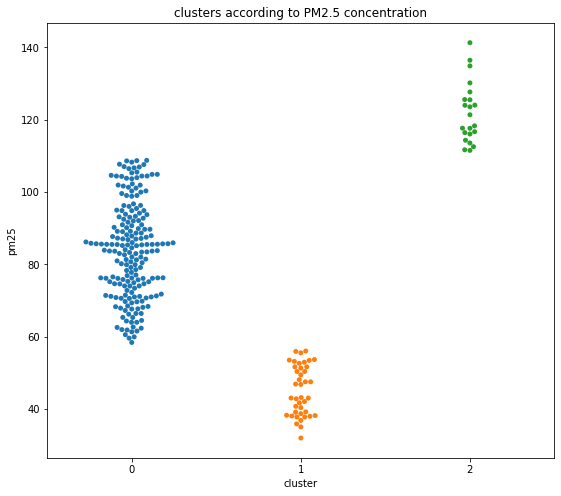

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='cluster', y='pm25', data=y, ax=ax)
ax.set_title('clusters according to PM2.5 concentration')

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(y[y['pm25']>0].index)):
    folium.Circle(
        location=[y.iloc[i]['latitude'],y.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ y.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(y.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(y.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(y.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=y.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

In [ ]:
p_2020=year_2020.iloc[:,[0,2]]

In [ ]:
x = {}
for i,j in enumerate(p_2020.iloc[:,0]):
  if j not in x:
    x[j]=[p_2020.iloc[i,1]]
  else:
    x[j].append(p_2020.iloc[i,1])

In [ ]:
y = pd.DataFrame(x).T

In [ ]:
y.columns = ["pm25"]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



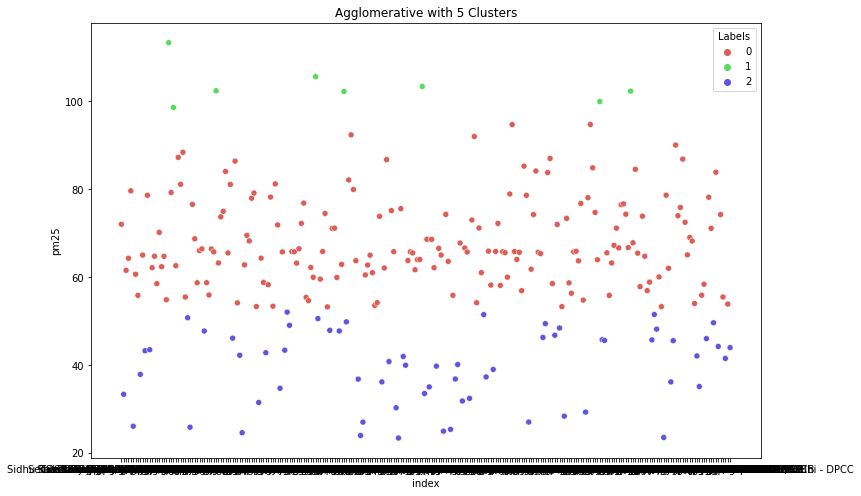

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(scaled_features)

y['Labels'] = agglom.labels_
y  = y.reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(y['index'],y['pm25'], hue=y['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 5 Clusters')
plt.show()

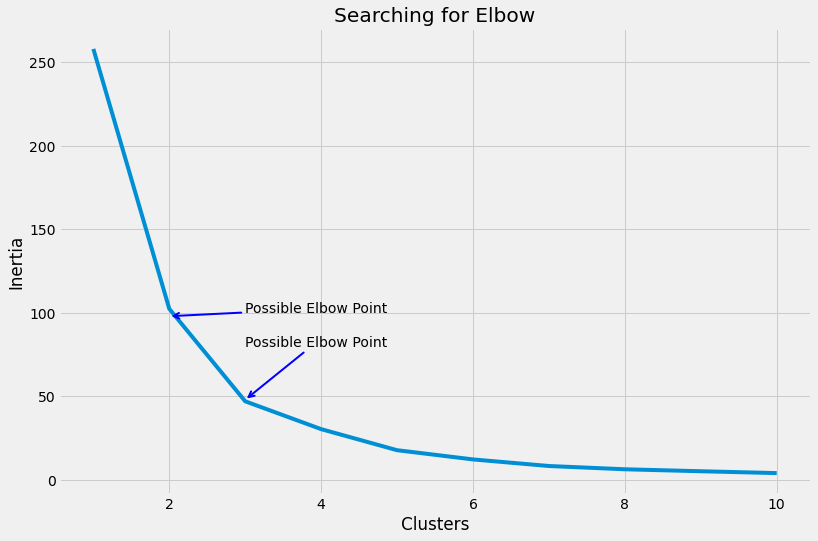

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(scaled_features)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(2, 98), xytext=(3, 100), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3,48), xytext=(3, 80), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



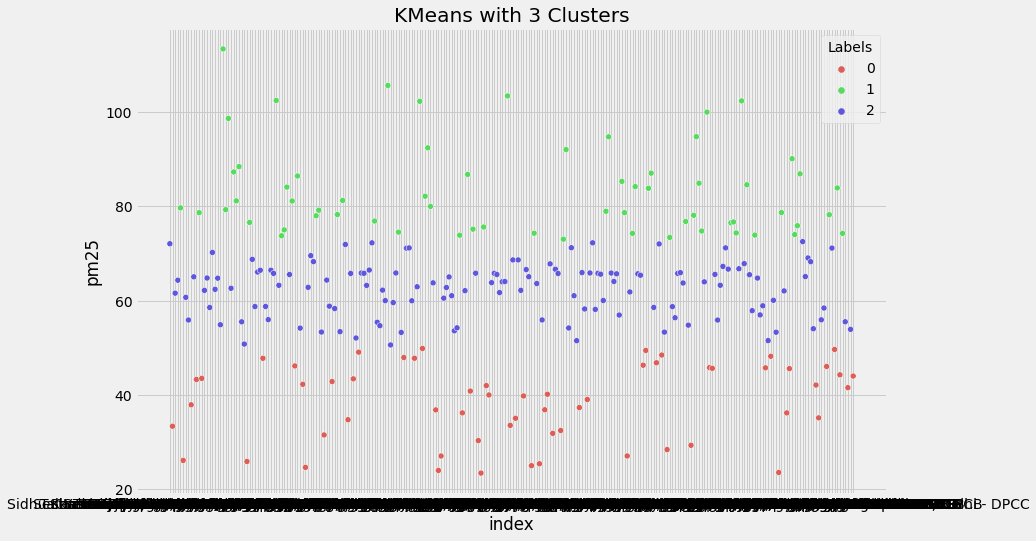

In [ ]:
km3 = KMeans(n_clusters=3).fit(y)

y['Labels'] = km3.labels_
y = y.reset_index()
plt.figure(figsize=(12, 8))

sns.scatterplot(y['index'],y['pm25'], hue=y['Labels'], 
                palette=sns.color_palette('hls',3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [ ]:
latitude = []
longitude = []
states = []
for i in y['index']:
  for j in range(len(lat_lon['station_name'])):
    if lat_lon['station_name'][j] == i: 
      states.append(lat_lon["State"][j])
      latitude.append(lat_lon["latitude"][j])
      longitude.append(lat_lon["longitude"][j])

In [ ]:
y["latitude"] = latitude
y["longitude"] = longitude

In [ ]:
e = [] 
for i in y['Labels']:
  if i==0:
    e.append("blue")
  elif i==1:
    e.append("orange")
  elif i==2:
    e.append("green")
  # elif i==3:
  #   e.append("yellow")
  # elif i==4:
  #   e.append("violet")
  # elif i==5:
  #   e.append("black")
  # elif i==6:
  #   e.append("pink")
  # elif i==7:
  #   e.append("brown")

In [ ]:
y["color"]=e

In [ ]:
y.columns = ["station","pm25","cluster","latitude","longitude","color"]

Text(0.5, 1.0, 'clusters according to PM2.5 concentration')

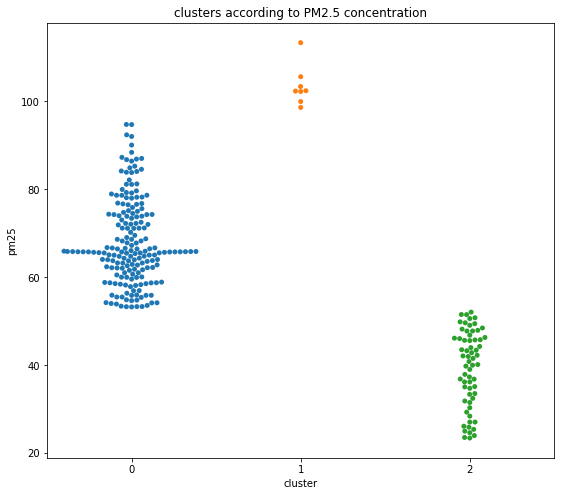

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='cluster', y='pm25', data=y, ax=ax)
ax.set_title('clusters according to PM2.5 concentration')

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
india = folium.Map(location=[20.5937, 78.9629], zoom_start=14,max_zoom=4,min_zoom=3, 
                   detect_retina = True,height = 600,width = '70%')
for i in range(0,len(y[y['pm25']>0].index)):
    folium.Circle(
        location=[y.iloc[i]['latitude'],y.iloc[i]['longitude']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+ y.iloc[i].station+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>concentration: "+str(y.iloc[i]['pm25'])+"</li>"+
         "<li>color: "+str(y.iloc[i]['color'])+"</li>"+
        "</ul>",
        radius=(int(np.log2(y.iloc[i]['pm25']+1)))*9000,
        color="black",
        weight =1,
        fill_color=y.iloc[i]["color"],
        fill=True,
        fill_opacity=0.7).add_to(india)
india

In [ ]:
kmeans.cluster_centers_